In [1]:
import seaborn as sns
%matplotlib inline

import pandas as pd 
import numpy as np
import pickle
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering, AffinityPropagation
from bs4 import BeautifulSoup
from IPython.display import SVG
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from HelperFunctions import *
%load_ext autoreload
%autoreload 2

In [3]:
data=pd.read_csv("processed_data.csv")
data.head(5)
data_dict = pickle.load(open('data_dict.p', 'rb'))

In [4]:
data_dict

{'>= bachelor': "Bachelor's degree or higher, percent of persons age 25+, 2009-2013",
 '>= high school': 'High school graduate or higher, percent of persons age 25+, 2009-2013',
 'aac': 'Race Alone or in Combination [1] - Asian',
 'age < 18': 'Persons under 18 years, percent, 2014',
 'age < 5': 'Persons under 5 years, percent, 2014',
 'age > 65': 'Persons 65 years and over, percent, 2014',
 'asian firms': 'Asian-owned firms, percent, 2007',
 'avg commute': 'Mean travel time to work (minutes), workers age 16+, 2009-2013',
 'bac': 'Race Alone or in Combination [1] - Black or African American',
 'below poverty': 'Persons below poverty level, percent, 2009-2013',
 'black firms': 'Black-owned firms, percent, 2007',
 'building permits': 'Building permits, 2014',
 'foreign_born': 'Foreign born persons, percent, 2009-2013',
 'hawaiian firms': 'Native Hawaiian- and Other Pacific Islander-owned firms, percent, 2007',
 'hispanic firms': 'Hispanic-owned firms, percent, 2007',
 'home value': 'Media

year,
fips,
county_name,
state,
m_bac,
m_iac,
m_aac,
m_nac,
f_bac,
f_iac,
f_aac,
f_nac,
t_hisp,
m_hisp,
f_hisp,
black firms,
land area,
>= bachelor
,hawaiian firms
,total firms
,native american firms,
pop density,
non_english,
same house > 1 yr,
veterans,multiunit housing
,asian firms,
home value,
nonfarm empl % change,homeownership rate,hispanic firms,nonfarm homes,>= high school,retail sales,service sector sales,a
ge > 65,merchant wholesaler sales,avg commute,nonemployer establishments,retail sales per capita,foreign_born,peeps per house,house
holds,age < 18,building permits,nonfarm empl,manufacturing shipments,income per cap,below poverty,age < 5,housing units,women firms
,household income

In [5]:
data.isnull().sum()

year                          0
fips                          0
county_name                   0
state                         0
m_bac                         0
m_iac                         0
m_aac                         0
m_nac                         0
m_wac                         0
f_bac                         0
f_iac                         0
f_aac                         0
f_nac                         0
f_wac                         0
t_hisp                        0
m_hisp                        0
f_hisp                        0
black firms                   2
land area                     2
>= bachelor                   2
hawaiian firms                2
total firms                   2
native american firms         2
pop density                   2
non_english                   2
same house > 1 yr             2
veterans                      2
multiunit housing             2
asian firms                   2
home value                    2
nonfarm empl % change         2
homeowne

In [6]:
(data == 0).sum()

year                             0
fips                             0
county_name                      0
state                            0
m_bac                            7
m_iac                            4
m_aac                           32
m_nac                          296
m_wac                            0
f_bac                            4
f_iac                            2
f_aac                           17
f_nac                          314
f_wac                            0
t_hisp                           0
m_hisp                           0
f_hisp                           2
black firms                   4696
land area                        0
>= bachelor                      0
hawaiian firms                6096
total firms                    344
native american firms         5276
pop density                      0
non_english                     10
same house > 1 yr                0
veterans                         0
multiunit housing               12
asian firms         

In [7]:
data[data.county_name == 'San Luis Obispo County']

year  fips             county_name       state  m_bac  m_iac  m_aac  \
196   2012  6079  San Luis Obispo County  California   5696   3680   7038   
3308  2016  6079  San Luis Obispo County  California   5324   3890   7836   

      m_nac   m_wac  f_bac    ...      manufacturing shipments  \
196     663  127942   2262    ...                    2548202.0   
3308    740  130399   2517    ...                    2548202.0   

      income per cap  below poverty  age < 5  housing units  women firms  \
196          29954.0           14.3      4.8       119143.0         27.7   
3308         29954.0           14.3      4.8       119143.0         27.7   

      household income  total_votes  votes_dem  votes_rep  
196            58697.0     117597.0    57655.0    56500.0  
3308           58697.0     120296.0    61021.0    50755.0  

[2 rows x 58 columns]

In [8]:
# drop na values for now
data = data.dropna()
data = data.reset_index()

In [9]:
data_2012_full = (data[data.year==2012])
data_2016_full = (data[data.year==2016])

data_2012_start = (data[data.year==2012])
data_2016_start = (data[data.year==2016])

In [10]:
def get_2012():
    # drop categorical
    data_2012 = data_2012_start.drop('state', axis=1)
    data_2012 = data_2012.drop('fips', axis=1)
    data_2012 = data_2012.drop('county_name', axis=1)
    data_2012 = data_2012.drop('year', axis=1)
    data_2012 = data_2012.drop('total_votes', axis=1)
    data_2012 = data_2012.drop('votes_dem', axis=1)
    data_2012 = data_2012.drop('votes_rep', axis=1)

    # standardize
    data_2012 = (data_2012 - data_2012.mean()) / data_2012.std()
    
    return data_2012

def get_2016():
    # drop categorical
    data_2016 = data_2016_start.drop('state', axis=1)
    data_2016 = data_2016.drop('fips', axis=1)
    data_2016 = data_2016.drop('county_name', axis=1)
    data_2016 = data_2016.drop('year', axis=1)
    data_2016 = data_2016.drop('total_votes', axis=1)
    data_2016 = data_2016.drop('votes_dem', axis=1)
    data_2016 = data_2016.drop('votes_rep', axis=1)
    
    # standardize
    data_2016 = (data_2016 - data_2016.mean()) / data_2016.std()
    
    return data_2016

In [11]:
def map_county_data(clusters, k, outname, county_svg, colors, changed=[]):
    """Create an SVG map with colors populated
    by a dictionary of (FIPS, cluster) value pairs.
    """
    county_svg = open(county_svg, 'r').read()
    
    soup = BeautifulSoup(county_svg, "html.parser")
    paths = soup.findAll('path')    

    # County style
    path_style = 'font-size:12px;fill-rule:nonzero;stroke:#FFFFFF;stroke-opacity:1; stroke-width:0.1;stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt; marker-start:none;stroke-linejoin:bevel;fill:'    
    
    for p in paths:
        if p['id'] not in ['State_Lines', 'separator']:
            try:
                cluster_class = clusters[int(p['id'])]
                if int(p['id']) in changed:
                    cluster_class = 4
            except: 
                if int(p['id']) in changed:
                    cluster_class = 4
                continue

            color = colors[cluster_class]
            p['style'] = path_style + color
    

    f = open(outname, 'w')
    f.write(soup.prettify())
    f.close()

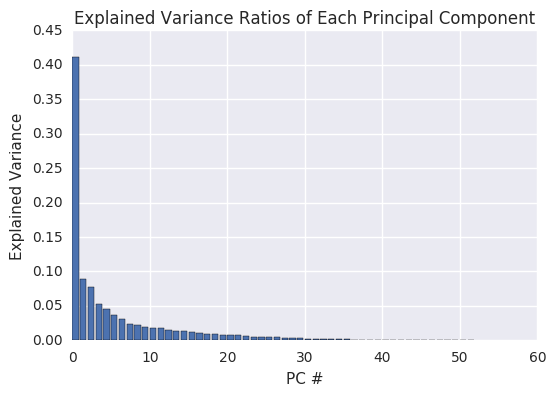

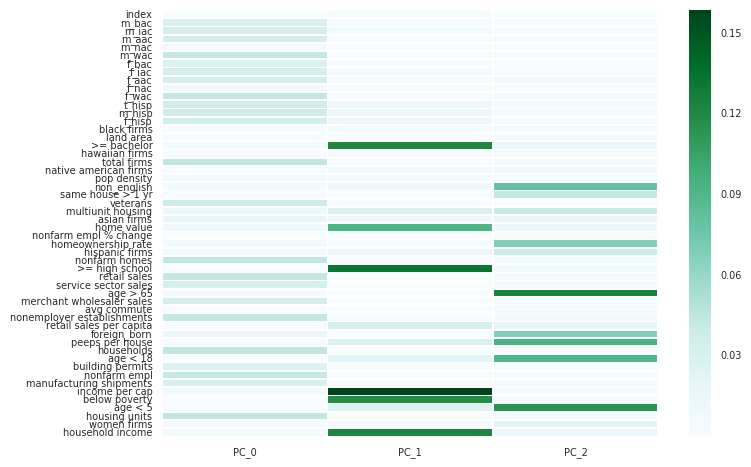

Most important features for each PC:
PC_0
households       0.044793
housing units    0.044588
total firms      0.044104
Name: PC_0, dtype: float64

PC_1
income per cap      0.158475
>= high school      0.133257
household income    0.122917
Name: PC_1, dtype: float64

PC_2
age > 65           0.125079
age < 5            0.113961
peeps per house    0.093763
Name: PC_2, dtype: float64



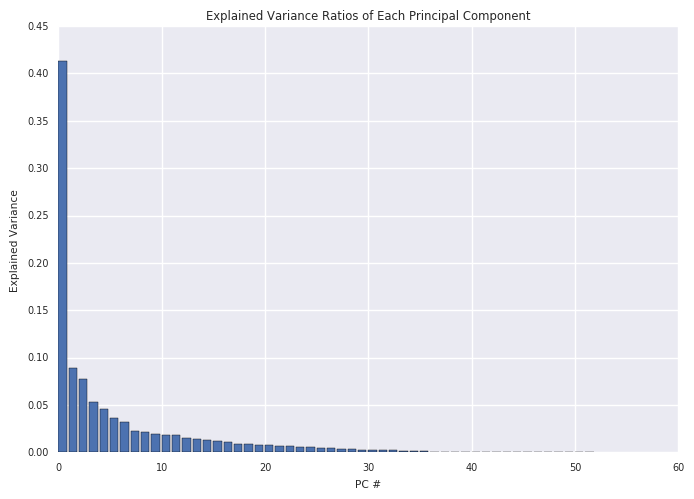

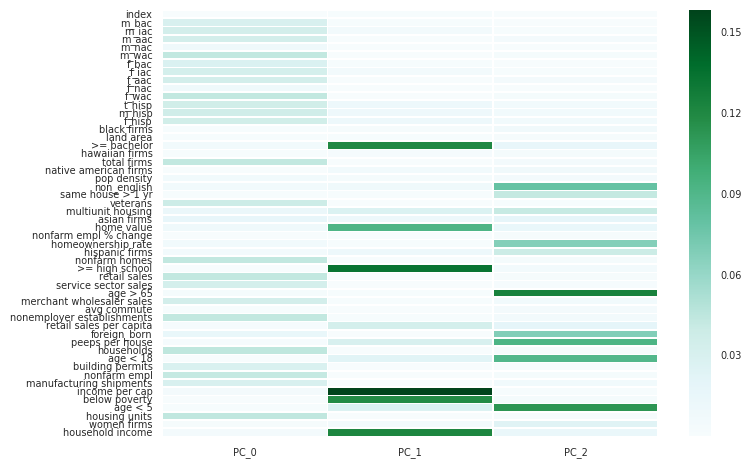

Most important features for each PC:
PC_0
households       0.044606
housing units    0.044425
total firms      0.043859
Name: PC_0, dtype: float64

PC_1
income per cap      0.158308
>= high school      0.133977
household income    0.122131
Name: PC_1, dtype: float64

PC_2
age > 65           0.124802
age < 5            0.112939
peeps per house    0.092689
Name: PC_2, dtype: float64



In [12]:
df = data[data.year==2012]
ignore = ['fips', 'year', 'county_name', 'state', 'total_votes', 'votes_dem', 
          'votes_rep']
predictors = [x for x in df.columns if x not in ignore]
df_pca_2012 = run_pca(get_2012(), predictors, 3)
df_pca_2016 = run_pca(get_2016(), predictors, 3)

# KMeans: Computation

In [13]:
num_c = 4

In [14]:
# d = pd.get_dummies(data, columns=['state'])
# init='k-means++'
kmeans12 = KMeans(n_clusters=num_c, init='random', n_jobs=3).fit(df_pca_2012)

In [15]:
kmeans16 = KMeans(n_clusters=num_c, init='random', n_jobs=3).fit(get_2016())

In [16]:
vc_12 = pd.Series(kmeans12.labels_).value_counts()
vc_16 = pd.Series(kmeans16.labels_).value_counts()

import operator
vc_12 = sorted(vc_12.items(), key=operator.itemgetter(1))
vc_16 = sorted(vc_16.items(), key=operator.itemgetter(1))

mapping = {}
for i,(k,v) in enumerate(vc_12):
    mapping[k] = vc_16[i][0]

for i in range(0, len(kmeans12.labels_)):
    kmeans12.labels_[i] = mapping[kmeans12.labels_[i]]


In [17]:
pd.Series(kmeans12.labels_).value_counts()

2    2235
1     786
3      84
0       6
dtype: int64

In [18]:
pd.Series(kmeans16.labels_).value_counts()

2    2007
1     952
3     135
0      17
dtype: int64

In [19]:
# convert into a dict of fips to cluster number
keys = list(data['fips'])
values = list(kmeans12.labels_)
clusters12 = dict(zip(keys, values))

In [20]:
# convert into a dict of fips to cluster number
keys = list(data['fips'])
values = list(kmeans16.labels_)
clusters16 = dict(zip(keys, values))

In [21]:
data_2016_full = data_2016_full.reset_index()

In [22]:
# Append the labels to the data
data_2012_full = pd.concat([data_2012_full, pd.Series(kmeans12.labels_)], axis=1).rename(columns={0:"label"})
data_2016_full = pd.concat([data_2016_full, pd.Series(kmeans16.labels_)], axis=1).rename(columns={0:"label"})

In [23]:
changed_counties = data_2012_full[data_2012_full['label'] != data_2016_full['label']]
print(changed_counties.county_name)
changed_counties = changed_counties.fips

0              Autauga County
15              Coffee County
23              Dallas County
36           Jefferson County
47            Marshall County
51              Morgan County
71              Graham County
72            Greenlee County
75              Mohave County
80             Yavapai County
116          Jefferson County
124             Lonoke County
127             Miller County
128        Mississippi County
135           Phillips County
139               Pope County
143        St. Francis County
148             Sevier County
164          Del Norte County
170               Inyo County
174             Lassen County
177              Marin County
183           Monterey County
185             Nevada County
189          Riverside County
192     San Bernardino County
198      Santa Barbara County
199        Santa Clara County
203           Siskiyou County
204             Solano County
                ...          
2746            Beaver County
2749            Carbon County
2753      

In [24]:
len(changed_counties)

327

### KMeans: Voting of each Cluster

In [25]:
group_2012 = data_2012_full.groupby(['label'])
group_2016 = data_2016_full.groupby(['label'])
s = group_2012['votes_dem'].mean() / group_2012['total_votes'].mean()
l = sorted(dict(s).items(), key=operator.itemgetter(1), reverse=True)
liberal_areas = l[0][0]
sort_of_liberal = l[1][0]
sort_of_rep = l[2][0]
republican_areas = l[3][0]
s

label
0    0.591674
1    0.480037
2    0.383300
3    0.613811
dtype: float64

In [26]:
group_2012['votes_rep'].mean() / group_2012['total_votes'].mean()

label
0    0.390041
1    0.503620
2    0.600833
3    0.371785
dtype: float64

In [27]:
group_2016['votes_dem'].mean() / group_2016['total_votes'].mean()

label
0    0.641262
1    0.415591
2    0.295893
3    0.580813
dtype: float64

In [28]:
red = '#FF0033'
lime = '#b6ff00'
light_orange = '#ffc700'
blue = '#0400ff'
sea_blue = '#0094ff'
pink = '#ee00ff'

colors = {liberal_areas:blue, 
          sort_of_liberal:sea_blue, 
          sort_of_rep:light_orange, 
          republican_areas:red,
          4: lime,
          5: pink,
          -1: pink
         }

In [29]:
# group['votes_dem'].mean() / group['total_votes'].mean()
liberal_cluster = group_2012.get_group(liberal_areas)
sort_of_liberal_cluster = group_2012.get_group(sort_of_liberal)
sort_of_rep_cluster = group_2012.get_group(sort_of_rep)
republican_cluster = group_2012.get_group(republican_areas)

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


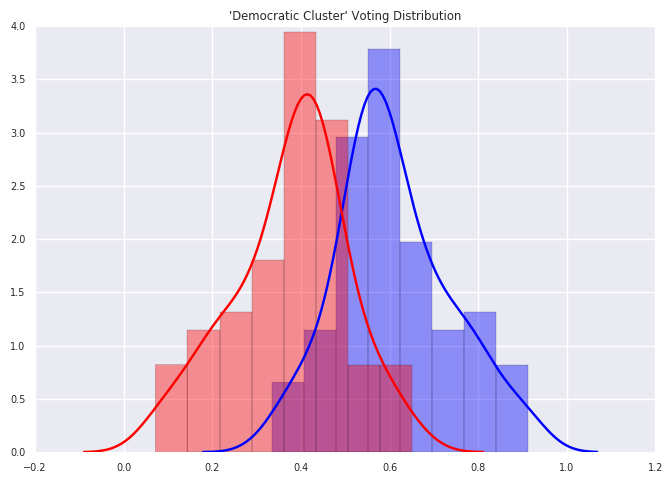

In [30]:
fig, ax = plt.subplots()
ax.set_title("'Democratic Cluster' Voting Distribution")
a = liberal_cluster['votes_dem'] / liberal_cluster['total_votes']
b = liberal_cluster['votes_rep'] / liberal_cluster['total_votes']
sns.distplot(a, ax=ax, color='b')
sns.distplot(b, ax=ax, color='r')

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


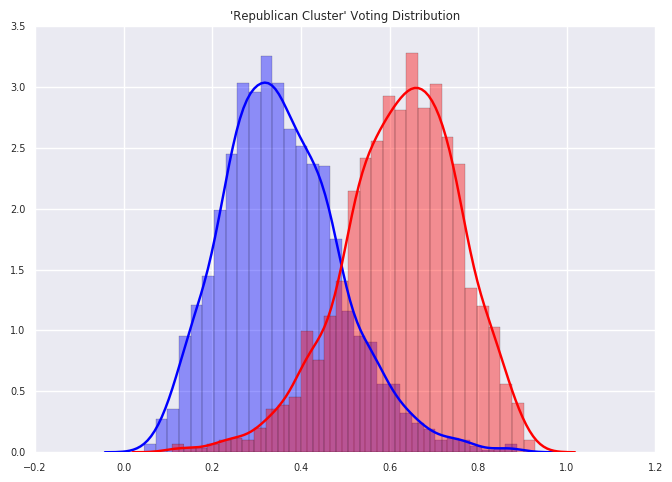

In [31]:
fig, ax = plt.subplots()
ax.set_title("'Republican Cluster' Voting Distribution")
a = republican_cluster['votes_dem'] / republican_cluster['total_votes']
b = republican_cluster['votes_rep'] / republican_cluster['total_votes']
sns.distplot(a, ax=ax, color='b')
sns.distplot(b, ax=ax, color='r')

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


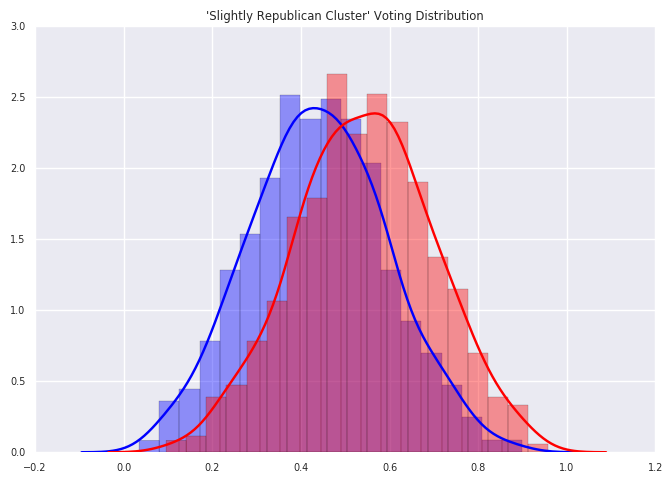

In [32]:
fig, ax = plt.subplots()
ax.set_title("'Slightly Republican Cluster' Voting Distribution")
a = sort_of_rep_cluster['votes_dem'] / sort_of_rep_cluster['total_votes']
b = sort_of_rep_cluster['votes_rep'] / sort_of_rep_cluster['total_votes']
sns.distplot(a, ax=ax, color='b')
sns.distplot(b, ax=ax, color='r')

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


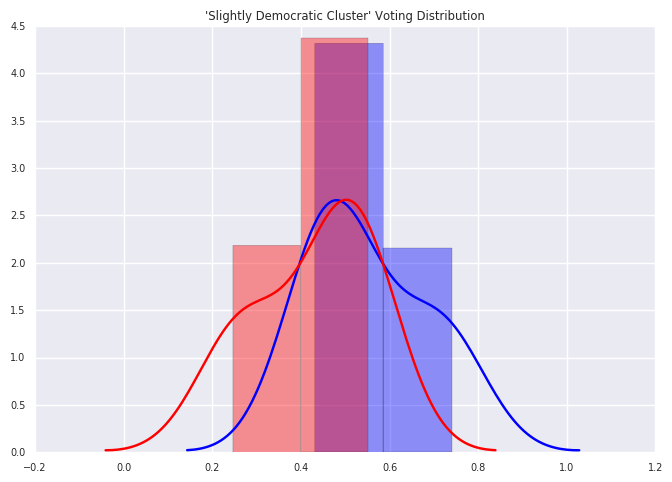

In [33]:
fig, ax = plt.subplots()
ax.set_title("'Slightly Democratic Cluster' Voting Distribution")
a = sort_of_liberal_cluster['votes_dem'] / sort_of_liberal_cluster['total_votes']
b = sort_of_liberal_cluster['votes_rep'] / sort_of_liberal_cluster['total_votes']
sns.distplot(a, ax=ax, color='b')
sns.distplot(b, ax=ax, color='r')

In [34]:
map_county_data(clusters12, num_c, 'test12.svg', 'county_map.svg', colors, changed_counties)

In [35]:
map_county_data(clusters16, num_c, 'test16.svg', 'county_map.svg', colors, changed_counties)

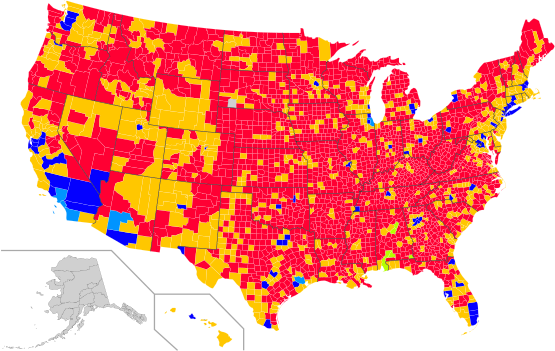

In [36]:
SVG('test12.svg')

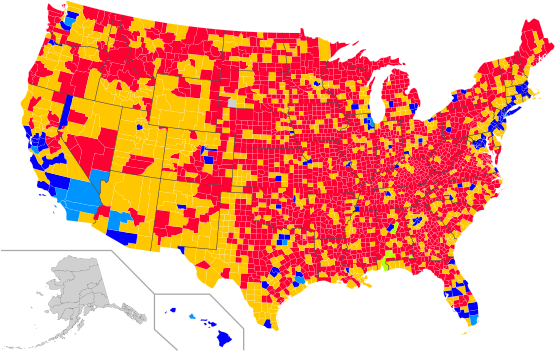

In [37]:
SVG('test16.svg')

In [38]:
counties12 = set()
for k, v in clusters12.items():
    if v == liberal_areas:
        c = data[data.fips == k].county_name.astype('str')
        for b in c:
            counties12.add(b)
            break
        
counties16 = set()
for k, v in clusters16.items():
    if v == 2:
        c = data[data.fips == k].county_name.astype('str')
        for b in c:
            counties16.add(b)
            break

In [39]:
def find_counties(cluster, politic, state):
    counties = set()
    for k, v in cluster.items():
        if v == politic:
            c = data[data.fips == k].iloc[0]
            if c.state == state:
                counties.add(c.county_name)
    return counties

In [40]:
find_counties(clusters12, liberal_areas, "Texas")

{'Bexar County',
 'Collin County',
 'Dallas County',
 'El Paso County',
 'Fort Bend County',
 'Hidalgo County',
 'Tarrant County',
 'Travis County'}

In [41]:
# eps=500000.0 eps=1.0, p=0.5, min_samples=2
db = DBSCAN(eps=4.8, min_samples=100, p=1.0).fit(get_2012())
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print(pd.Series(db.labels_).value_counts())

Estimated number of clusters: 1
 0    2817
-1     294
dtype: int64


In [42]:
keys = list(data['fips'])
values = list(db.labels_)
clusters_dbscan_12 = dict(zip(keys, values))
colors[-1] = pink
map_county_data(clusters_dbscan_12, num_c, 'test_DBSCAN_12.svg', 'county_map.svg', {-1:pink, 0: light_orange})

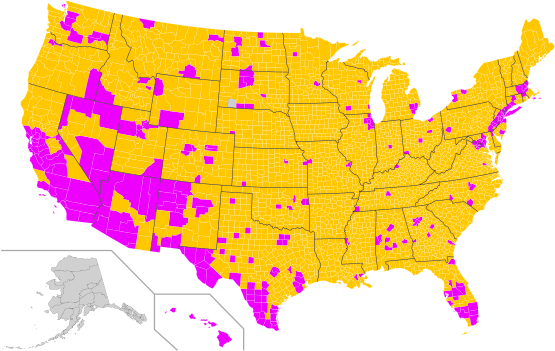

In [43]:
SVG('test_DBSCAN_12.svg')

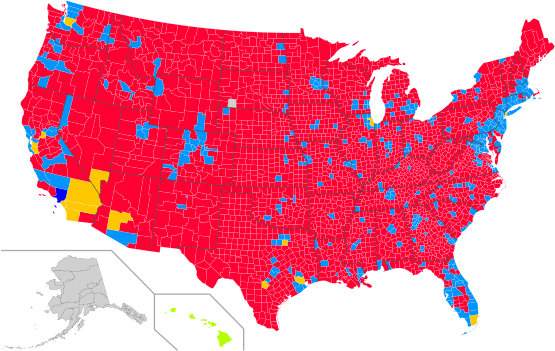

In [44]:
ag = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(get_2012())
keys = list(data['fips'])
values = list(ag.labels_)
clusters_ag_12 = dict(zip(keys, values))
map_county_data(clusters_ag_12, num_c, 'test_ag_12.svg', 'county_map.svg', colors)
SVG('test_ag_12.svg')

In [45]:
pd.Series(clusters_ag_12).value_counts()

2    2688
0     399
1      19
4       4
3       1
dtype: int64

In [46]:
ag.children_


array([[ 741,  754],
       [ 592,  647],
       [ 795,  804],
       ..., 
       [ 175, 6213],
       [6215, 6217],
       [6218, 6219]])

In [47]:
ag.n_leaves_

3111

In [65]:
def compare_clusters(d, c1, c2, comparator, title=""):
    group = d.groupby(['label'])
    c1 = group.get_group(c1)
    c2 = group.get_group(c2)
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_title(title)
    a = c1[comparator]
    b = c2[comparator]
    print("Cluster 1 is red, Cluster 2 is blue")
    sns.distplot(a, ax=ax, color='r', kde=False, hist_kws={"range": [15000,100000]})
    sns.distplot(b, ax=ax, color='b', kde=False, hist_kws={"range": [15000,100000]})

def plot_property(d, c1, comparator, color, title="", bins=None):
    group = d.groupby(['label'])
    fig, ax = plt.subplots()
    ax.set_title(title)
    c1 = group.get_group(c1)
    a = c1[comparator] / c1.m_wac
    sns.distplot(a, ax=ax, color=color, kde=False, bins=bins)#, hist_kws={"range": [0,60]})
    
def cluster_hist(d):
    group = d.groupby(['label'])
    s = pd.Series(d['label']).value_counts()
    labels = s.keys()
    print("Displayed in order of how 'liberal' the counties in the cluster are...")
    
    mapping = {}
    for l in labels:
        cluster = group.get_group(l)
        mapping[l] = cluster['votes_dem'].mean() / cluster['total_votes'].mean()
    
    labels = sorted(mapping.items(), key=operator.itemgetter(1), reverse=True)
    for l,v in labels:
        cluster = group.get_group(l)
        fig, ax = plt.subplots()
        ax.set_title(str(l) + " Voting Distribution")
        a = cluster['votes_dem'] / cluster['total_votes']
        b = cluster['votes_rep'] / cluster['total_votes']
        sns.distplot(a, ax=ax, color='b', bins=7)
        sns.distplot(b, ax=ax, color='r', bins=7)
        
    

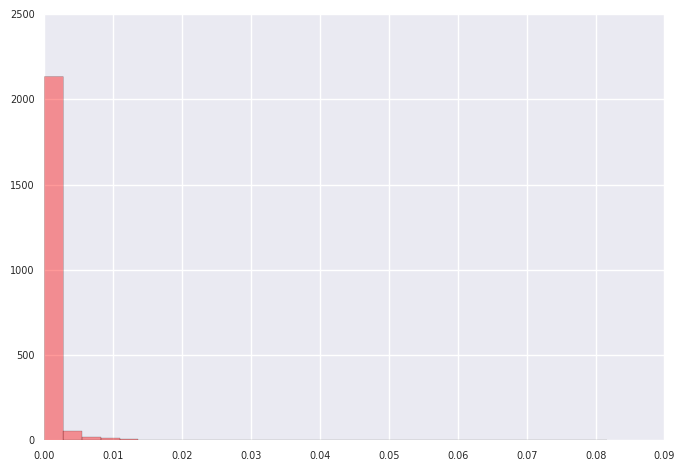

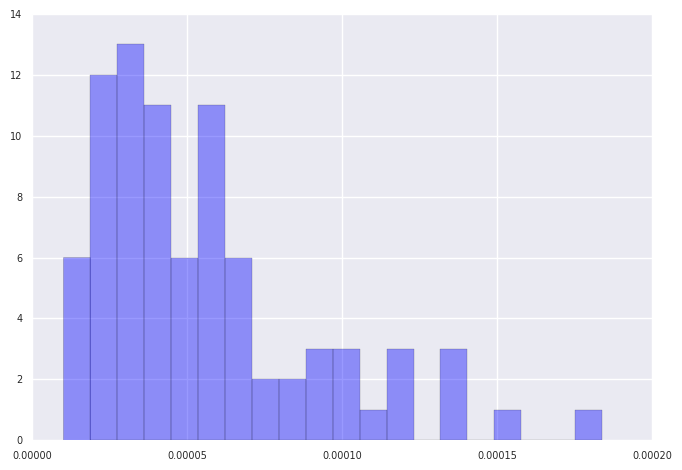

In [68]:
prop = 'foreign_born'
plot_property(data_2012_full, republican_areas, prop, 'r', bins=30)
plot_property(data_2012_full, liberal_areas, prop, 'b', bins=20)

In [50]:
g2012 = data_2012_full.groupby(['label'])
g2016 = data_2016_full.groupby(['label'])
print(g2012.get_group(republican_areas)['m_bac'].mean())
print(g2012.get_group(republican_areas)['m_bac'].std())
print()
print(g2012.get_group(liberal_areas)['m_bac'].mean())
print(g2012.get_group(liberal_areas)['m_bac'].std())

1368.33959732
2487.07354872

101807.619048
84720.4792272


In [51]:
g2016.get_group(liberal_areas)

level_0  index  year   fips            county_name  \
36       3147   3148  2016   1073       Jefferson County   
77       3188   3189  2016   4019            Pima County   
157      3268   3269  2016   6001         Alameda County   
163      3274   3275  2016   6013    Contra Costa County   
166      3277   3278  2016   6019          Fresno County   
171      3282   3283  2016   6029            Kern County   
177      3288   3289  2016   6041           Marin County   
183      3294   3295  2016   6053        Monterey County   
190      3301   3302  2016   6067      Sacramento County   
194      3305   3306  2016   6075   San Francisco County   
195      3306   3307  2016   6077     San Joaquin County   
197      3308   3309  2016   6081       San Mateo County   
198      3309   3310  2016   6083   Santa Barbara County   
204      3315   3316  2016   6095          Solano County   
205      3316   3317  2016   6097          Sonoma County   
206      3317   3318  2016   6099      Stanislaus County   
212      3323   3324  2016   6111         Ventura County   
217      3328   3329  2016   8005        Arapahoe County   
231      3342   3343  2016   8031          Denver County   
236      3347   3348  2016   8041         El Paso County   
245      3356   3357  2016   8059       Jefferson County   
279      3390   3391  2016   9001       Fairfield County   
280      3391   3392  2016   9003        Hartford County   
283      3394   3395  2016   9009       New Haven County   
288      3399   3400  2016  10003      New Castle County   
290      3401   3402  2016  11001   District of Columbia   
295      3406   3407  2016  12009         Brevard County   
296      3407   3408  2016  12011         Broward County   
301      3412   3413  2016  12021         Collier County   
305      3416   3417  2016  12031           Duval County   
...       ...    ...   ...    ...                    ...   
2215     5326   5327  2016  42003       Allegheny County   
2222     5333   5334  2016  42017           Bucks County   
2228     5339   5340  2016  42029         Chester County   
2236     5347   5348  2016  42045        Delaware County   
2259     5370   5371  2016  42091      Montgomery County   
2264     5375   5376  2016  42101    Philadelphia County   
2284     5395   5396  2016  44007      Providence County   
2415     5526   5528  2016  47037        Davidson County   
2475     5586   5588  2016  47157          Shelby County   
2506     5617   5619  2016  48029           Bexar County   
2534     5645   5647  2016  48085          Collin County   
2552     5663   5665  2016  48121          Denton County   
2562     5673   5675  2016  48141         El Paso County   
2570     5681   5683  2016  48157       Fort Bend County   
2599     5710   5712  2016  48215         Hidalgo County   
2661     5772   5774  2016  48339      Montgomery County   
2711     5822   5824  2016  48439         Tarrant County   
2718     5829   5831  2016  48453          Travis County   
2737     5848   5850  2016  48491      Williamson County   
2763     5874   5876  2016  49035       Salt Lake County   
2795     5906   5908  2016  51013       Arlington County   
2817     5928   5930  2016  51059         Fairfax County   
2841     5952   5954  2016  51107         Loudoun County   
2861     5972   5974  2016  51153  Prince William County   
2884     5995   5997  2016  51510        Alexandria city   
2918     6029   6031  2016  51810    Virginia Beach city   
2948     6059   6061  2016  53053          Pierce County   
2952     6063   6065  2016  53061       Snohomish County   
3028     6139   6141  2016  55025            Dane County   
3056     6167   6169  2016  55079       Milwaukee County   

                     state   m_bac  m_iac   m_aac  m_nac  ...    \
36                 Alabama  131490   2424    6170    301  ...     
77                 Arizona   27801  26939   19948   2140  ...     
157             California  105252  19272  256835  13082  ...     
163             C

In [52]:
g2012.get_group(liberal_areas)['county_name']

77                Pima County
157            Alameda County
163       Contra Costa County
166             Fresno County
171               Kern County
189          Riverside County
190         Sacramento County
192     San Bernardino County
194      San Francisco County
195        San Joaquin County
197          San Mateo County
199        Santa Clara County
212            Ventura County
231             Denver County
279          Fairfield County
280           Hartford County
283          New Haven County
290      District of Columbia
296            Broward County
305              Duval County
318       Hillsborough County
333         Miami-Dade County
338             Orange County
340         Palm Beach County
342           Pinellas County
390               Cobb County
401             DeKalb County
417             Fulton County
424           Gwinnett County
518           Honolulu County
                ...          
1838            Queens County
1849           Suffolk County
1857      

In [53]:
g2016.get_group(liberal_areas)['county_name']

36           Jefferson County
77                Pima County
157            Alameda County
163       Contra Costa County
166             Fresno County
171               Kern County
177              Marin County
183           Monterey County
190         Sacramento County
194      San Francisco County
195        San Joaquin County
197          San Mateo County
198      Santa Barbara County
204             Solano County
205             Sonoma County
206         Stanislaus County
212            Ventura County
217           Arapahoe County
231             Denver County
236            El Paso County
245          Jefferson County
279          Fairfield County
280           Hartford County
283          New Haven County
288         New Castle County
290      District of Columbia
295            Brevard County
296            Broward County
301            Collier County
305              Duval County
                ...          
2215         Allegheny County
2222             Bucks County
2228      

In [54]:
liberal_cluster['votes_dem'] / liberal_cluster['total_votes']

77      0.521493
157     0.784567
163     0.657143
166     0.476365
171     0.384794
189     0.487949
190     0.569618
192     0.515718
194     0.834386
195     0.534839
197     0.713060
199     0.698084
212     0.515548
231     0.734543
279     0.549798
280     0.622480
283     0.618748
290     0.913638
296     0.671945
305     0.477668
318     0.528451
333     0.616448
338     0.586726
340     0.582033
342     0.522348
390     0.428902
401     0.778594
417     0.642322
424     0.446200
518     0.688924
          ...   
1838    0.787774
1849    0.508330
1857    0.603756
1919    0.608241
1951    0.544678
2030    0.688381
2037    0.601114
2043    0.517940
2155    0.416686
2172    0.363157
2203    0.758013
2215    0.566402
2259    0.566372
2264    0.852243
2415    0.585153
2475    0.626302
2506    0.515973
2534    0.334619
2548    0.571110
2562    0.656364
2570    0.460857
2599    0.704338
2711    0.414307
2718    0.601574
2763    0.388352
2817    0.592572
2938    0.688112
2948    0.5433

In [55]:
liberal_cluster['votes_rep'] / liberal_cluster['total_votes']

77      0.463102
157     0.186842
163     0.320412
166     0.505665
171     0.593876
189     0.492143
190     0.406318
192     0.461673
194     0.132869
195     0.446175
197     0.265535
199     0.277304
212     0.462545
231     0.244271
279     0.440945
280     0.365996
283     0.371028
290     0.071244
296     0.322753
305     0.513850
318     0.461501
333     0.379144
338     0.404500
340     0.411861
342     0.466010
390     0.554919
401     0.210639
417     0.345971
424     0.539867
518     0.297875
          ...   
1838    0.203247
1849    0.479694
1857    0.381788
1919    0.383070
1951    0.442162
2030    0.301670
2037    0.383831
2043    0.468619
2155    0.583314
2172    0.636843
2203    0.208776
2215    0.421858
2259    0.422868
2264    0.140515
2415    0.397958
2475    0.365573
2506    0.470310
2534    0.650722
2548    0.416946
2562    0.330406
2570    0.529204
2599    0.286300
2711    0.571477
2718    0.362449
2763    0.581680
2817    0.394812
2938    0.289209
2948    0.4336

Displayed in order of how 'liberal' the counties in the cluster are...


/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


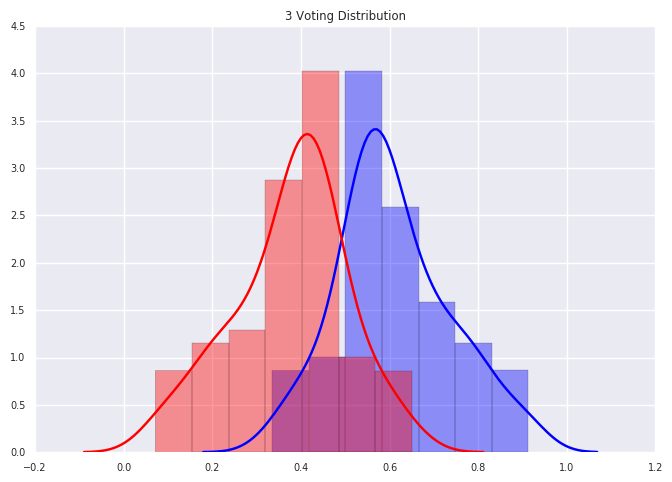

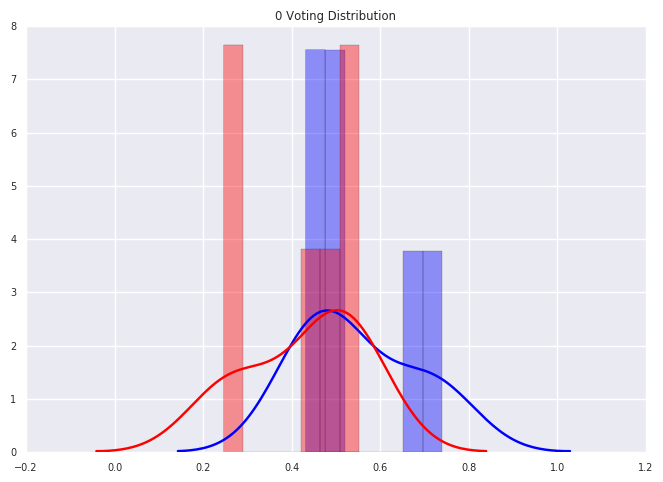

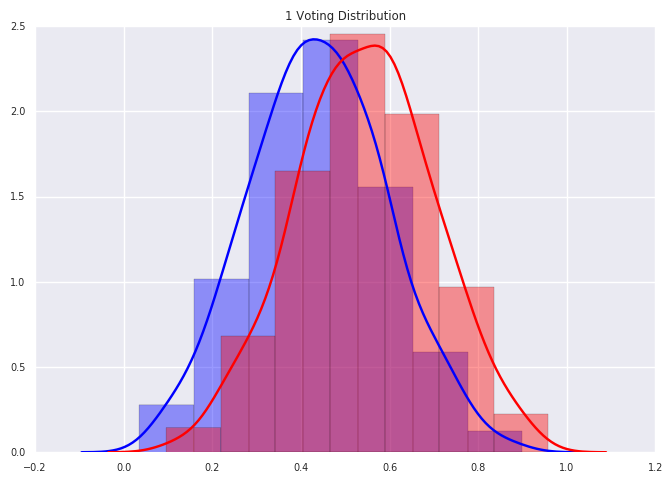

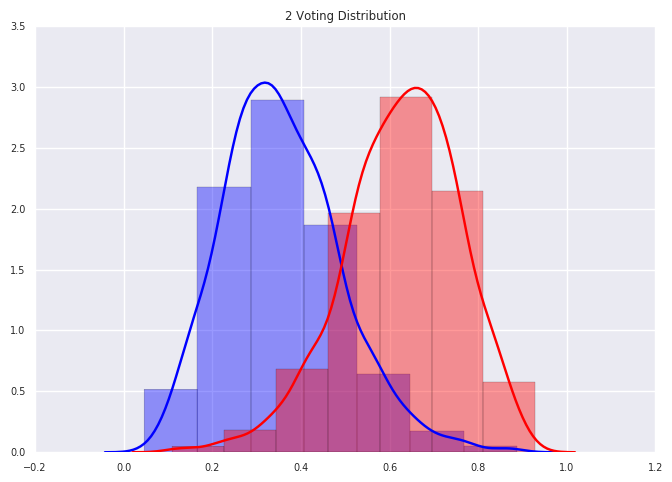

In [56]:
cluster_hist(data_2012_full)

Displayed in order of how 'liberal' the counties in the cluster are...


/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


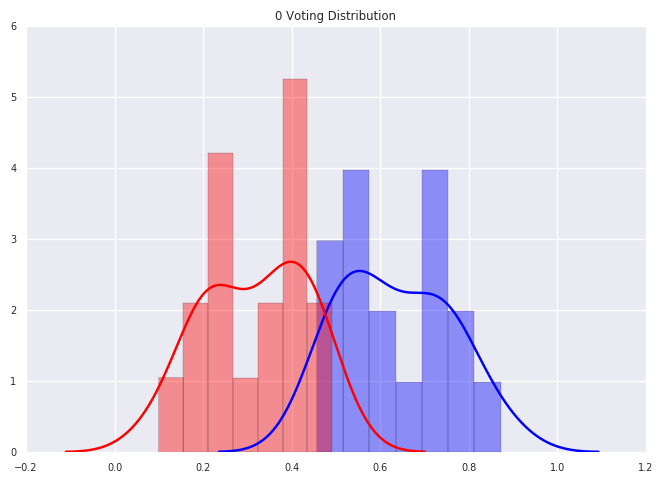

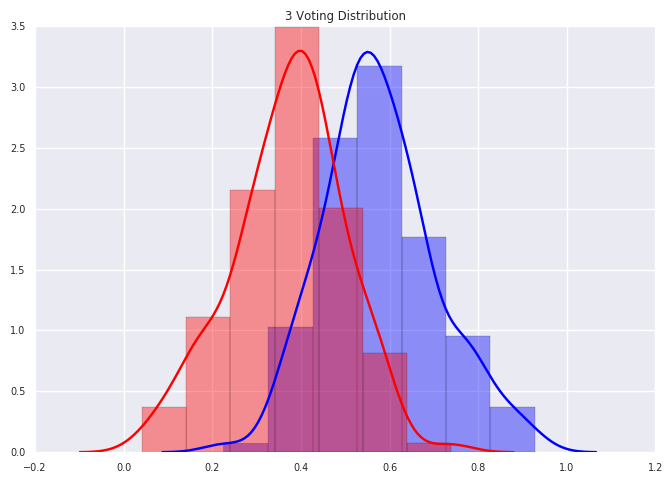

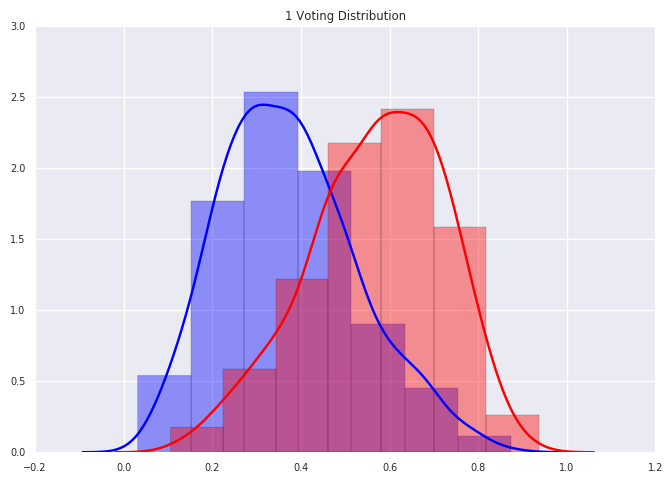

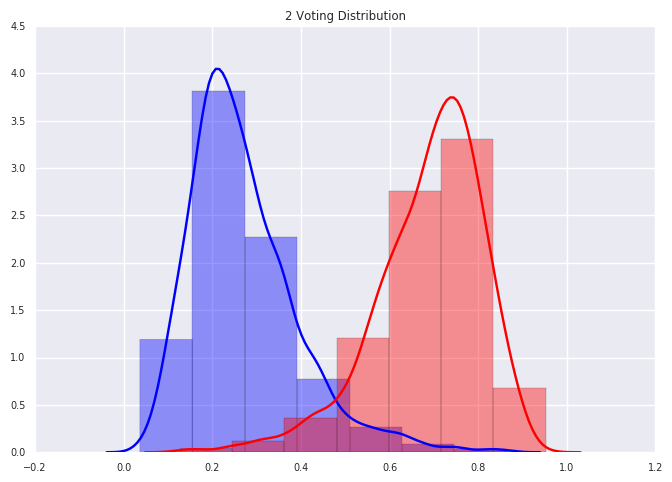

In [57]:
cluster_hist(data_2016_full)

In [58]:
def county_difference(d2012, d2016, label):
    counties12 = set()
    for k, v in d2012.items():
        if v == label:
            c = data[data.fips == k].county_name.astype('str')
            for b in c:
                counties12.add(b)
                break

    counties16 = set()
    for k, v in d2016.items():
        if v == label:
            c = data[data.fips == k].county_name.astype('str')
            for b in c:
                counties16.add(b)
                break
    print(counties12.difference(counties16))

In [59]:
county_difference(clusters12, clusters16, liberal_areas)

{'San Bernardino County', 'Riverside County', 'Miami-Dade County', 'Kings County', 'Honolulu County', 'Clark County', 'New York County', 'Dallas County', 'Queens County', 'King County', 'Santa Clara County'}


In [60]:
county_difference(clusters12, clusters16, sort_of_liberal)

set()


In [61]:
county_difference(clusters12, clusters16, sort_of_rep)

{'Somerset County', 'Monterey County', 'Washoe County', 'Arlington County', 'Talbot County', 'Maui County', 'Ouray County', 'East Baton Rouge Parish', 'El Paso County', 'Elbert County', 'Denton County', 'Norfolk County', 'Morris County', 'Baltimore city', 'Marin County', 'Monmouth County', 'Solano County', 'Dane County', 'Sedgwick County', 'Kauai County', 'Belknap County', 'Geauga County', 'Santa Barbara County', 'Guilford County', 'Collier County', 'Chester County', 'Kane County', 'Rockland County', 'Anne Arundel County', 'Hawaii County', 'Macomb County', 'Bucks County', 'Alexandria city', 'Goochland County', 'Worcester County', 'Passaic County', 'Prince William County', 'Sonoma County', 'Mercer County', 'Virginia Beach city', 'Providence County', 'New Castle County', 'Will County', 'Arapahoe County', 'Loudoun County', 'Brevard County', 'Stanislaus County', 'Nevada County', 'Burlington County', 'Poquoson city'}


In [62]:
county_difference(clusters12, clusters16, republican_areas)

{'Colquitt County', 'Gonzales County', 'Nodaway County', 'Tehama County', 'Hamblen County', 'Saginaw County', 'Lamb County', 'Stutsman County', 'Ziebach County', 'Malheur County', 'Taney County', 'Taos County', 'Nez Perce County', 'Muscatine County', 'Echols County', 'Scotts Bluff County', 'Vermilion Parish', 'Willacy County', 'Erath County', 'Hunt County', 'Ramsey County', 'Thurston County', 'Montrose County', 'Rosebud County', 'Prince George County', 'Power County', 'Box Butte County', 'Kanawha County', 'Lassen County', 'Minidoka County', 'Pemiscot County', 'Leflore County', 'Kosciusko County', 'Bennett County', 'Beadle County', 'Eureka County', 'Cochran County', 'Wasco County', 'Matagorda County', 'LaGrange County', 'Salem County', 'Sunflower County', 'Greenlee County', 'Benson County', 'St. John the Baptist Parish', 'Atkinson County', 'Nash County', 'Coles County', 'Guadalupe County', 'Jim Wells County', 'Hidalgo County', 'Kankakee County', 'Walton County', 'Pettis County', 'Bennin

In [63]:
for col in data_2012_full.columns:
    changed_hm = data_2012_full[data_2012_full[col] != data_2016_full[col]]
    if len(changed_hm) > 0:
        print(col)
#         print(len(changed_hm))

index
year
m_bac
m_iac
m_aac
m_nac
m_wac
f_bac
f_iac
f_aac
f_nac
f_wac
t_hisp
m_hisp
f_hisp
total_votes
votes_dem
votes_rep
label


In [64]:
cols = ["m_bac",
"m_iac",
"m_aac",
"m_nac",
"f_bac",
"f_iac",
"f_aac",
"f_nac",
"t_hisp",
"m_hisp",
"f_hisp"]

# changed_rows = data_2012_full[data_2012_full['m_bac'] != data_2016_full['m_bac']]

for col in cols:
    print(col + ": " + str(np.max(data_2012_full[col] - data_2016_full[col])))

m_bac: 13014
m_iac: 2336
m_aac: 58
m_nac: 58
f_bac: 13784
f_iac: 2765
f_aac: 62
f_nac: 45
t_hisp: 1175
m_hisp: 1814
f_hisp: 473
